#importing Libraries

In [134]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import data set

In [135]:
df = pd.read_csv("fraud_dataset.csv")

In [136]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [138]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("Total Missing Values",df.isna().sum().sum())

Missing Values by Column
------------------------------
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64
------------------------------
Total Missing Values 0


#Exploratory Data Analysis

In [139]:

#Now we have to work on data set to understand more about data set

In [140]:
fraud = len(df[df['Fraud_Risk']==0])
notfraud = len(df[df['Fraud_Risk']==1])

pct_fraud = fraud/(fraud+notfraud)
print("percentage of non fraud Risk is", round(pct_fraud*100,2))

pct_notfraud = notfraud/(fraud+notfraud)
print("Percentage of Not Fraud Risk", round(pct_notfraud*100,2))

percentage of non fraud Risk is 42.32
Percentage of Not Fraud Risk 57.68


In [141]:
#correlation of dataframe

In [142]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
Gender,1.000000,0.355319,0.121868,-0.080883,0.256583,0.010382,0.116468,0.089613,-0.074194,-0.019499,-0.006226,-0.002798,0.309570
Married,0.355319,1.000000,0.375512,-0.034168,0.829158,0.071710,0.106108,0.175254,-0.108588,-0.085615,-0.093419,-0.019892,0.825064
Dependents,0.121868,0.375512,1.000000,-0.025549,0.349978,0.130331,0.026961,0.182559,-0.050031,-0.085019,-0.022433,-0.012152,0.315421
Education,-0.080883,-0.034168,-0.025549,1.000000,-0.027868,0.127969,0.050707,0.154714,0.109241,0.057124,0.001073,-0.103206,-0.037406
Self_Employed,0.256583,0.829158,0.349978,-0.027868,1.000000,0.138274,0.078241,0.229533,-0.104434,-0.049356,-0.106595,-0.049677,0.688170
ApplicantIncome,0.010382,0.071710,0.130331,0.127969,0.138274,1.000000,-0.120363,0.564923,-0.004199,-0.022038,-0.049480,-0.018499,0.066347
CoapplicantIncome,0.116468,0.106108,0.026961,0.050707,0.078241,-0.120363,1.000000,0.165940,-0.054756,-0.035843,-0.018713,0.003190,0.120304
LoanAmount,0.089613,0.175254,0.182559,0.154714,0.229533,0.564923,0.165940,1.000000,0.073583,-0.024920,-0.084477,0.022021,0.164087
Loan_Term,-0.074194,-0.108588,-0.050031,0.109241,-0.104434,-0.004199,-0.054756,0.073583,1.000000,0.076045,0.026219,0.084809,-0.097339
Credit_History_Available,-0.019499,-0.085615,-0.085019,0.057124,-0.049356,-0.022038,-0.035843,-0.024920,0.076045,1.000000,0.017112,-0.005251,-0.239512


In [143]:
# Visualize the correlation in dataset

Text(0.5, 1.0, 'Correlation between two variable')

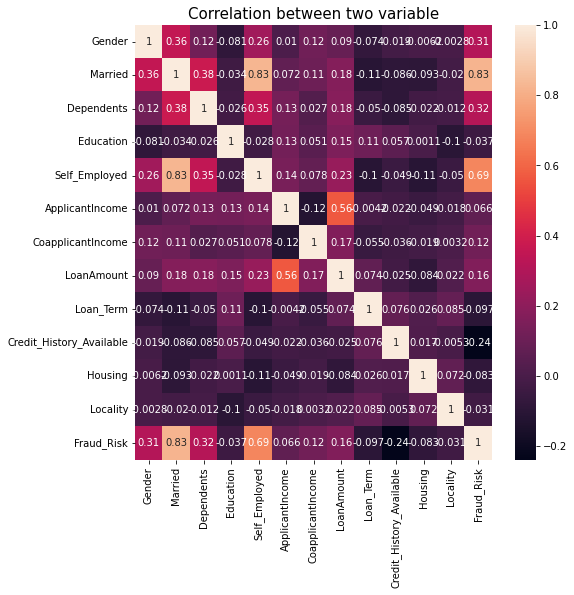

In [144]:
plt.figure(figsize= (8,8))

sns.heatmap(df.corr(method='pearson'), annot=True)
plt.title("Correlation between two variable", size=15)

In [145]:
df.cov()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
Gender,0.195491,0.078543,0.050426,-0.014554,0.056126,2.567629e+01,1.443343e+02,3.162620,-2.471915,-0.002751,-0.001310,-0.000954,0.067666
Married,0.078543,0.249951,0.175691,-0.006952,0.205088,2.005430e+02,1.486874e+02,6.993743,-4.090815,-0.013657,-0.022228,-0.007672,0.203923
Dependents,0.050426,0.175691,0.875787,-0.009731,0.162037,6.822563e+02,7.071983e+01,13.636941,-3.528104,-0.025386,-0.009991,-0.008773,0.145928
Education,-0.014554,-0.006952,-0.009731,0.165630,-0.005611,2.913232e+02,5.784115e+01,5.025886,3.350090,0.007418,0.000208,-0.032404,-0.007526
Self_Employed,0.056126,0.205088,0.162037,-0.005611,0.244766,3.826632e+02,1.084950e+02,9.064308,-3.893320,-0.007791,-0.025099,-0.018961,0.168315
ApplicantIncome,25.676290,200.543039,682.256260,291.323220,382.663178,3.128963e+07,-1.887097e+06,252233.915759,-1769.945428,-39.332636,-131.725545,-79.832352,183.473175
CoapplicantIncome,144.334350,148.687394,70.719825,57.841145,108.495008,-1.887097e+06,7.855957e+06,37124.917094,-11564.651796,-32.053481,-24.961834,6.896990,166.698275
LoanAmount,3.162620,6.993743,13.636941,5.025886,9.064308,2.522339e+05,3.712492e+04,6371.304385,442.584028,-0.634653,-3.209175,1.356008,6.474980
Loan_Term,-2.471915,-4.090815,-3.528104,3.350090,-3.893320,-1.769945e+03,-1.156465e+04,442.584028,5678.097353,1.828301,0.940264,4.930154,-3.626076
Credit_History_Available,-0.002751,-0.013657,-0.025386,0.007418,-0.007791,-3.933264e+01,-3.205348e+01,-0.634653,1.828301,0.101800,0.002598,-0.001293,-0.037779


Text(0.5, 1.0, 'Covariance')

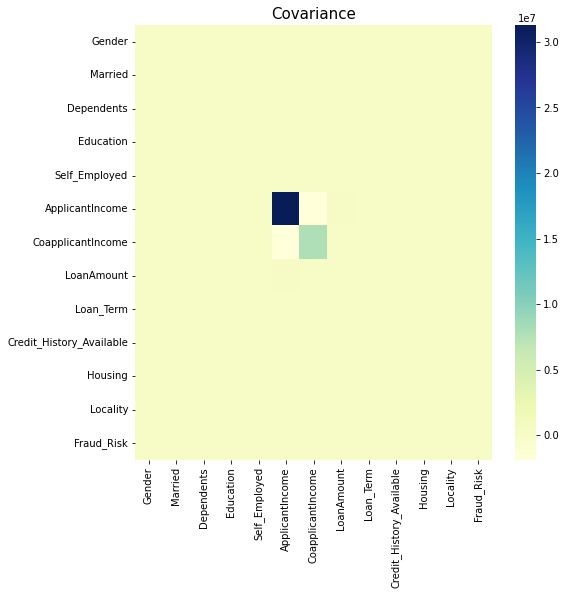

In [146]:
#visualize covariance
plt.figure(figsize= (8,8))

sns.heatmap(df.cov(), cmap="YlGnBu")
plt.title("Covariance", size=15)

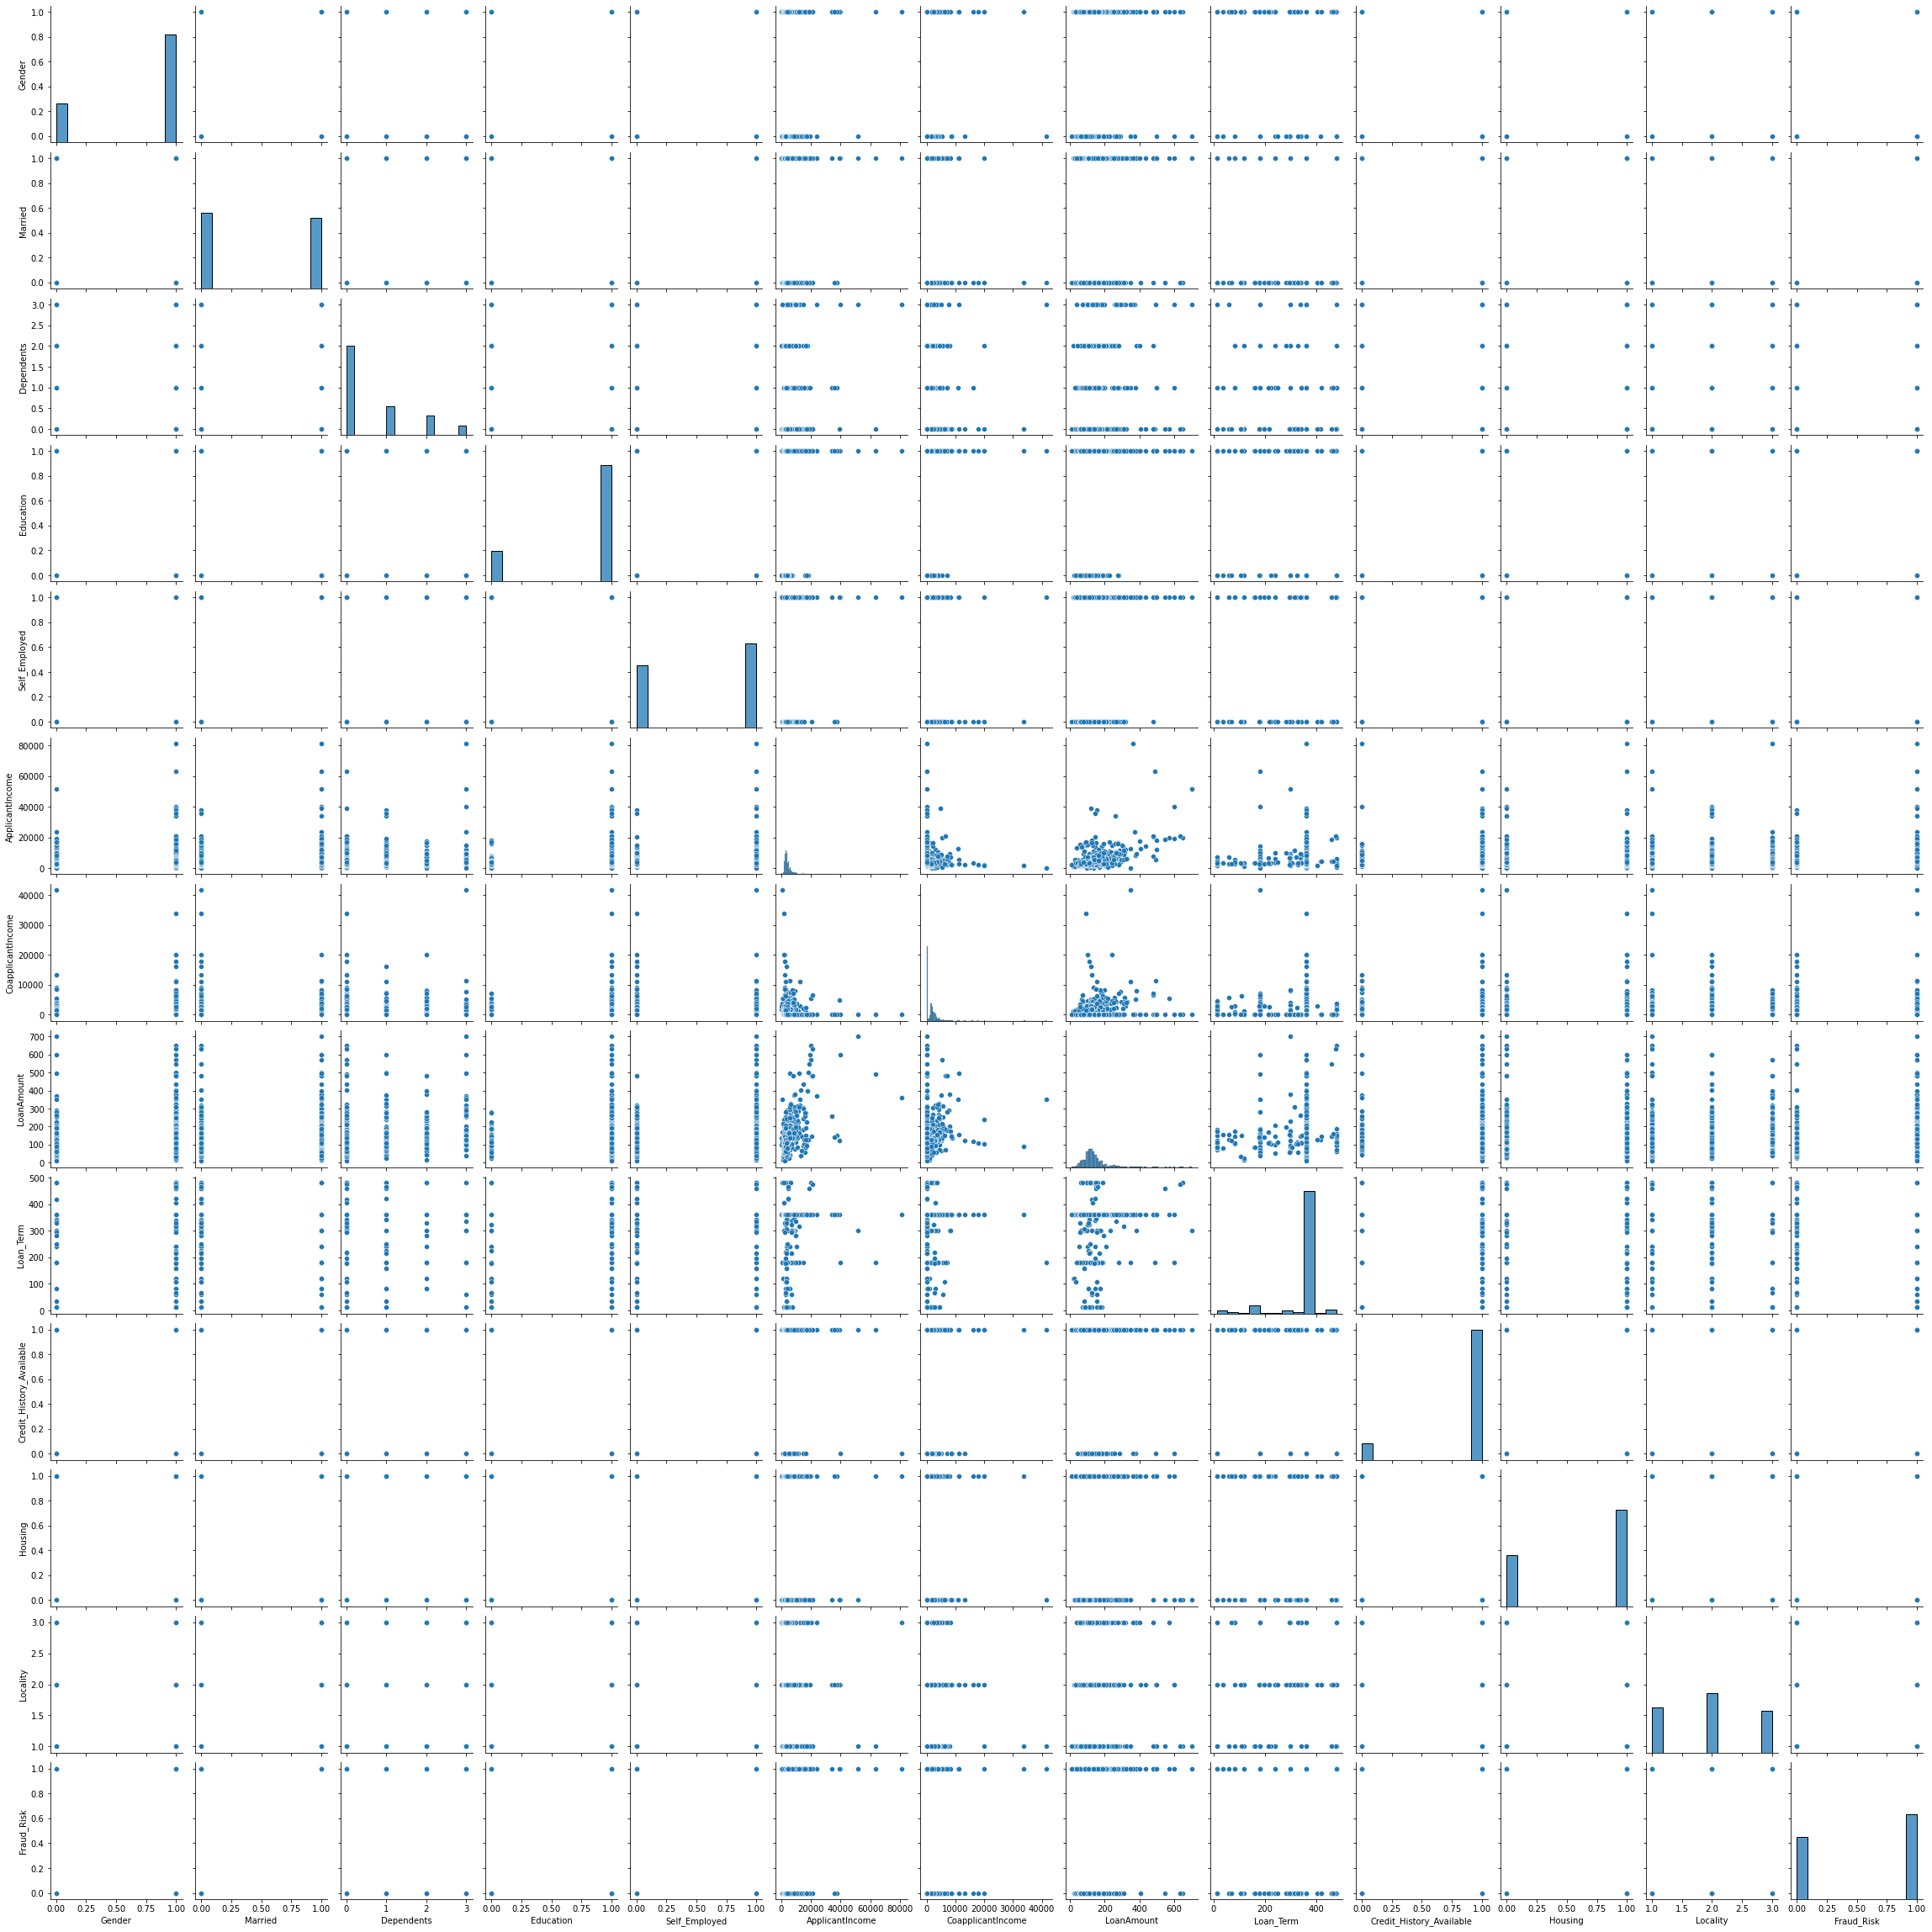

In [92]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


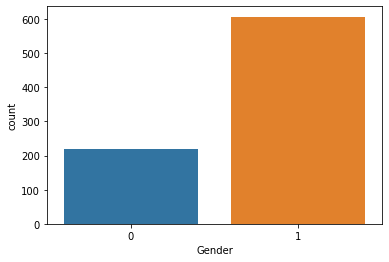

In [147]:
sns.countplot(df['Gender'], label='Fraud_Risk')

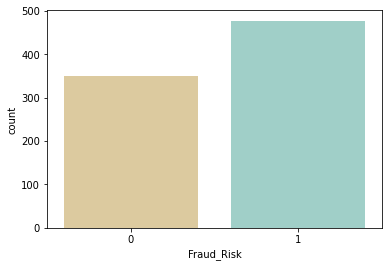

In [148]:
sns.countplot(x='Fraud_Risk', data=df, palette = 'BrBG')

In [149]:
df.groupby('Fraud_Risk').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
Fraud_Risk,,,,,,,,,,,,
0,0.574286,0.000000,0.308571,0.808571,0.177143,4779.974286,1092.642857,125.611429,346.685714,0.974286,0.700000,2.005714
1,0.851153,0.834382,0.905660,0.777778,0.865828,5530.683438,1774.714885,152.104822,331.849057,0.819706,0.620545,1.958071


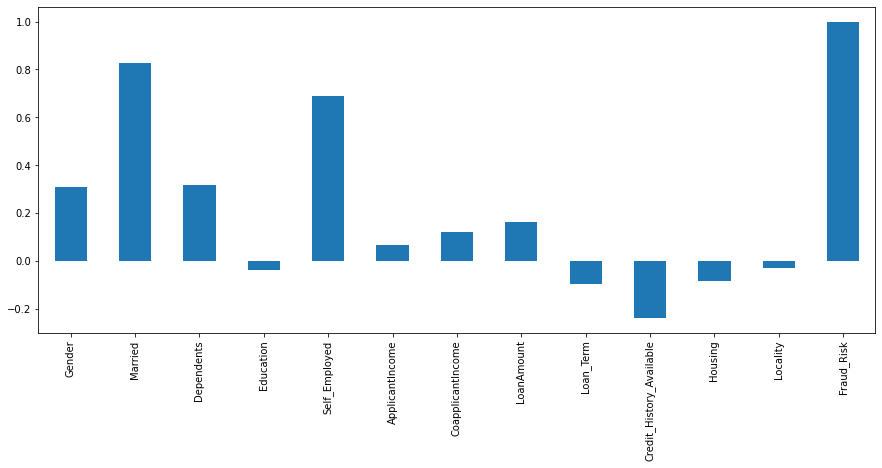

In [150]:
plt.figure(figsize=(15,6))
df.corr()['Fraud_Risk'].plot(kind = 'bar')
plt.show()

#We can observe strong positive co-relation between the attributes Married & Self Employed to the target variable which is Fraud Risk.

In [151]:
# seperate dataset into x and y 

In [152]:
x = df.drop(['Fraud_Risk'],axis=1)
y = df['Fraud_Risk']

In [153]:
print(x.shape)
print(y.shape)

(827, 12)
(827,)


In [154]:
#standardise the Dataset by Standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x=sc.fit_transform(x)

# split the datasets into train and test 

In [155]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [156]:
print("x_train Shape : ", x_train.shape)
print("x_test Shape : ", x_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

x_train Shape :  (661, 12)
x_test Shape :  (166, 12)
y_train Shape :  (661,)
y_test Shape :  (166,)


#Apply algorithms one by one 

#(i) Support vector machine

In [157]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(x_train,y_train)

SVC()

In [158]:
train_pred_svm = svm.predict(x_train)
test_pred_svm = svm.predict(x_test)

In [159]:
svm_score_train = svm.score(x_train,y_train)
svm_score_test = svm.score(x_test,y_test)

#(ii) KNN Algorithm

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [161]:
test_pred_knc = knc.predict(x_test)
train_pred_knc = knc.predict(x_train) 

In [162]:
knc_score_train = knc.score(x_train,y_train)

knc_score_test = knc.score(x_test,y_test)

#(iii) Applying Decision Tree Classifier

In [163]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [164]:
train_dtc_pred = dtc.predict(x_train)
test_dtc_pred=dtc.predict(x_test)

In [165]:
dtc_score_train = dtc.score(x_train,y_train)

dtc_score_test = dtc.score(x_test,y_test)

#(iv)Applying Random Forest Classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [167]:
train_pred_rfc= rfc.predict(x_train)
test_pred_rfc=rfc.predict(x_test)

In [168]:
rfc_score_train = rfc.score(x_train,y_train)

rfc_score_test = rfc.score(x_test,y_test)

#(v) Logistic Regresion

---



In [169]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [170]:
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)

In [171]:

lr_score_train = lr.score(x_train,y_train)
lr_score_test = lr.score(x_test,y_test)

#Score Table

In [182]:
model_compare = DataFrame({
    'Model' : ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest'],
    'Scores_test' : [lr_score_test*100, svm_score_test*100, knc_score_test*100, dtc_score_test*100, rfc_score_test*100],
    'Score_train' : [lr_score_train*100, svm_score_train*100, knc_score_train*100, dtc_score_train*100, rfc_score_test*100]
})
model_compare

,Model,Scores_test,Score_train
0,Logistic Regression,92.771084,93.040847
1,SVM,93.975904,93.797277
2,KNN,91.566265,92.284418
3,Decision Tree,92.168675,100.000000
4,Random Forest,93.975904,93.975904


In [181]:
model_compare_df = model_compare.sort_values(by='Scores_test', ascending=False)
model_compare_df.reset_index()[model_compare_df.columns]

,Model,Scores_test,Score_train
0,SVM,93.975904,93.797277
1,Random Forest,93.975904,93.975904
2,Logistic Regression,92.771084,93.040847
3,Decision Tree,92.168675,100.000000
4,KNN,91.566265,92.284418


#Conclusion :



In [172]:
#from the above conclusion we can say that the randomforestClassifier Algorithm is the best algorithm on thios datasets

In [187]:
rfc_train_pred = rfc.predict(x_train)
rfc_test_pred = rfc.predict(x_test)




In [188]:
from sklearn.metrics import classification_report 
cr = classification_report(y_test,rfc_test_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        66
           1       0.98      0.92      0.95       100

    accuracy                           0.94       166
   macro avg       0.93      0.94      0.94       166
weighted avg       0.94      0.94      0.94       166



In [175]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,rfc_test_pred)
conf_matrix

array([[64,  2],
       [ 8, 92]])

#because of all algorithm are above 85% accuracy so all are good for predict